Proyek Analisis Data

Dibuat oleh : Hilmi Rahman Nurdiansyah



#Mengenai Dataset
Disini saya menggunakan E-Commerce Public Dataset sebagai data yang akan di analisis

##Menyiapkan Library yang akan dipakai

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Wrangling

###Gathering data

In [2]:
customers_df = pd.read_csv('drive/MyDrive/Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
order_items_df = pd.read_csv('drive/MyDrive/Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,product_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [4]:
products_df = pd.read_csv('drive/MyDrive/Dataset/products_dataset.csv')
products_df.head()

,product_category_name,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,perfumaria,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,artes,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,esporte_lazer,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,bebes,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,utilidades_domesticas,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [5]:
sellers_df = pd.read_csv('drive/MyDrive/Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_zip_code_prefix,seller_city,seller_state,seller_id
0,13023,campinas,SP,3442f8959a84dea7ee197c632cb2df15
1,13844,mogi guacu,SP,d1b65fc7debc3361ea86b5f14c68d2e2
2,20031,rio de janeiro,RJ,ce3ad9de960102d0677a81f5d0bb7b2d
3,4195,sao paulo,SP,c0f3eea2e14555b6faeea3dd58c1b1c3
4,12914,braganca paulista,SP,51a04a8a6bdcb23deccc82b0b80742cf


###Assessing Data

####Menilai Tabel `customers_df`

In [6]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


####Menilai Tabel `order_items`

In [10]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   product_id           112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [11]:
order_items_df.nunique()

order_id               98666
product_id             32951
order_item_id             21
seller_id               3095
shipping_limit_date    54615
price                   5968
freight_value           6999
dtype: int64

In [12]:
order_items_df.isna().sum()

order_id               0
product_id             0
order_item_id          0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [13]:
print("Jumlah duplikasi: ",order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


####Menilai tabel `products_df`

In [14]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_category_name       32341 non-null  object 
 1   product_id                  32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


####Menilai tabel `sellers_df`

In [16]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_zip_code_prefix  3095 non-null   int64 
 1   seller_city             3095 non-null   object
 2   seller_state            3095 non-null   object
 3   seller_id               3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [17]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


##Cleaning Data

Pada Tahap ini tidak terdapat data yang missing maupun duplicated. maka menurut saya proses ini saya skip

##Menggabungkan Data

###Menggabungkan data `order_items_df` dan `products_df`

In [18]:
product_items_df = pd.merge(
    left=products_df,
    right=order_items_df,
    how="outer",
    left_on="product_id",
    right_on="product_id"
)
product_items_df

,product_category_name,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,perfumaria,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,4/30/2018 17:33,10.91,7.39
1,artes,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2/6/2018 19:11,248.00,17.99
2,esporte_lazer,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,7/11/2018 21:30,79.80,7.82
3,bebes,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,8/7/2018 9:10,112.30,9.54
4,utilidades_domesticas,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,4/17/2018 1:30,37.90,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,59e88b7d3675e89aceaf86f372d3bc9a,2,4324dd16853115efb0fd9d0d131ba6f4,1/10/2018 3:32,29.90,16.11
112646,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,1,4324dd16853115efb0fd9d0d131ba6f4,3/14/2018 2:30,29.90,23.28
112647,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,2,4324dd16853115efb0fd9d0d131ba6f4,3/14/2018 2:30,29.90,23.28
112648,informatica_acessorios,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,6e4465d771f02e4fe335225de3c6c043,3,4324dd16853115efb0fd9d0d131ba6f4,3/14/2018 2:30,29.90,23.28


In [19]:
product_items_df.nunique()

product_category_name            73
product_id                    32951
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
order_id                      98666
order_item_id                    21
seller_id                      3095
shipping_limit_date           54615
price                          5968
freight_value                  6999
dtype: int64

In [20]:
product_items_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   product_category_name       111047 non-null  object 
 1   product_id                  112650 non-null  object 
 2   product_name_lenght         111047 non-null  float64
 3   product_description_lenght  111047 non-null  float64
 4   product_photos_qty          111047 non-null  float64
 5   product_weight_g            112632 non-null  float64
 6   product_length_cm           112632 non-null  float64
 7   product_height_cm           112632 non-null  float64
 8   product_width_cm            112632 non-null  float64
 9   order_id                    112650 non-null  object 
 10  order_item_id               112650 non-null  int64  
 11  seller_id                   112650 non-null  object 
 12  shipping_limit_date         112650 non-null  object 
 13  price         

In [21]:
product_items_df.isna().sum()


product_category_name         1603
product_id                       0
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

disini saya gunakan drop untuk membersihkan produk kategori yang missing value

In [22]:
product_df=product_items_df.dropna()
product_df.isna().sum()

product_category_name         0
product_id                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
order_id                      0
order_item_id                 0
seller_id                     0
shipping_limit_date           0
price                         0
freight_value                 0
dtype: int64

###Menggabungkan data `seller_df` dan `order_items_df`

In [23]:
seller_order_df = pd.merge(
    left=sellers_df,
    right=order_items_df,
    how="outer",
    left_on="seller_id",
    right_on="seller_id"
)
seller_order_df.head()

,seller_zip_code_prefix,seller_city,seller_state,seller_id,order_id,product_id,order_item_id,shipping_limit_date,price,freight_value
0,13023,campinas,SP,3442f8959a84dea7ee197c632cb2df15,4a90af3e85dd563884e2afeab1091394,ffb64e34a37740dafb6c88f1abd1fa61,1,8/25/2017 20:50,106.20,9.56
1,13023,campinas,SP,3442f8959a84dea7ee197c632cb2df15,6d953888a914b67350d5bc4d48f2acab,f4621f8ad6f54a2e3c408884068be46d,1,5/11/2017 16:25,101.70,15.92
2,13023,campinas,SP,3442f8959a84dea7ee197c632cb2df15,bc8a5de6abf5b14f98a6135a7fb46731,325a06bcce0da45b7f4ecf2797dd40e4,2,9/5/2017 12:50,10.80,2.42
3,13844,mogi guacu,SP,d1b65fc7debc3361ea86b5f14c68d2e2,035201c3c82a97f8a25dd6bd5244b2d5,1c36a5285f7f3b1ed2637d7c528ce5ff,1,11/22/2017 4:30,89.99,45.09
4,13844,mogi guacu,SP,d1b65fc7debc3361ea86b5f14c68d2e2,0504447548229e075dea8441b37b1e2a,8852eb03b04ec3268a66e9b696e25f6f,1,10/6/2017 2:14,199.90,21.89


In [24]:
print("jumlah duplicate: ", seller_order_df.duplicated().sum())
seller_order_df.isna().sum()

jumlah duplicate:  0


seller_zip_code_prefix    0
seller_city               0
seller_state              0
seller_id                 0
order_id                  0
product_id                0
order_item_id             0
shipping_limit_date       0
price                     0
freight_value             0
dtype: int64

merge data normal

##Eksplor Data

disini saya akan sekaligus menjelaskan pertanyaan bisnis yang akan saya pakai untuk kode dalam eksplor data.

###pertanyaan bisnis pertama
pengelompokan barang yang terjual dengan product.id yang ada

akan ditunjukkan barang mana yang memiliki trend tertinggi.

In [25]:
product_items_df.groupby(by="product_category_name").product_id.count().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_id, Length: 73, dtype: int64

In [26]:
name_product=product_df['product_category_name']
name_product.describe()
name_product.unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio',
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
       '

In [27]:
product_items_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

terlihat apabila diurutkan dari yang terbesar product cama_mesa_banho menunjukkan angka tertinggi maka barang tersebut yang paling sering dipesan.

###Pertanyaan kedua
disini kita akan mencari tau seller yang paling sering menjual barang. disini akan di kelompokkan setiap kota seller dengan count state

In [28]:
seller_order_df.groupby(by="seller_city").seller_id.count().sort_values(ascending=False)

seller_city
sao paulo           27983
ibitinga             7750
curitiba             3016
santo andre          2964
belo horizonte       2593
                    ...  
sapiranga               1
janauba                 1
jarinu                  1
juzeiro do norte        1
04482255                1
Name: seller_id, Length: 611, dtype: int64

###Eksplorasi lain

In [29]:
customers_df.groupby(by="customer_city").customer_id.nunique()

customer_city
abadia dos dourados     3
abadiania               1
abaete                 12
abaetetuba             11
abaiara                 2
                       ..
xinguara                9
xique-xique             3
zacarias                2
ze doca                 5
zortea                  2
Name: customer_id, Length: 4119, dtype: int64

In [30]:
customers_df.groupby(by="customer_state").customer_id.nunique()

customer_state
AC       81
AL      413
AM      148
AP       68
BA     3380
CE     1336
DF     2140
ES     2033
GO     2020
MA      747
MG    11635
MS      715
MT      907
PA      975
PB      536
PE     1652
PI      495
PR     5045
RJ    12852
RN      485
RO      253
RR       46
RS     5466
SC     3637
SE      350
SP    41746
TO      280
Name: customer_id, dtype: int64

##Visualisasi Data

###Univariate Visualization

####Bar Chart

Berdasarkan pertanyaan pertama yaitu produk yang memiliki penjualan tertinggi. disini saya menggunakan head(10) agar hanya di tampilkan 10 data penjualan produk tertinggi.

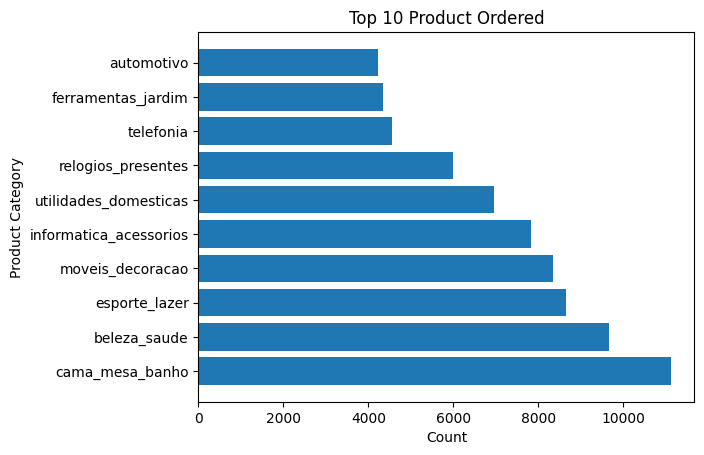

In [31]:
category_counts = product_df.groupby("product_category_name")["order_id"].count()
top_categories = category_counts.sort_values(ascending=False).head(10)
plt.barh(y=top_categories.index, width=top_categories.values)
plt.xlabel('Count')  # Label for x-axis
plt.ylabel('Product Category')  # Label for y-axis
plt.title('Top 10 Product Ordered')
plt.show()

untuk pertanyaan kedua yaitu seller yang memiliki penjualan terbanyak di setiap state dan di setiap kota, untuk kota disini saya menggunakan 10 terbesar saja

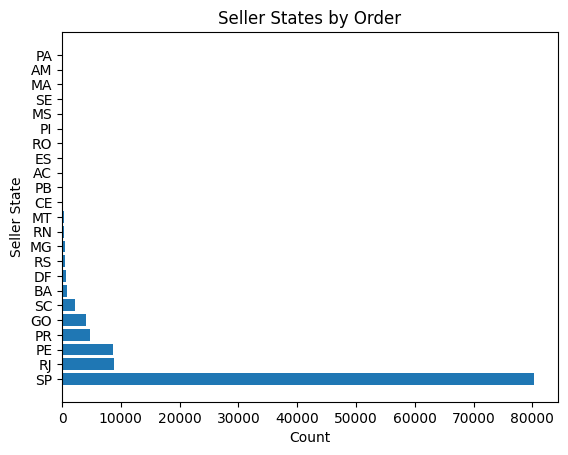

In [32]:
plt.barh(y=seller_order_df['seller_state'].unique(), width=seller_order_df.groupby(by="seller_state")["seller_id"].count().sort_values(ascending=False))
plt.xlabel('Count')  # Label for x-axis
plt.ylabel('Seller State')  # Label for y-axis
plt.title('Seller States by Order')  # Title for the plot
plt.show()

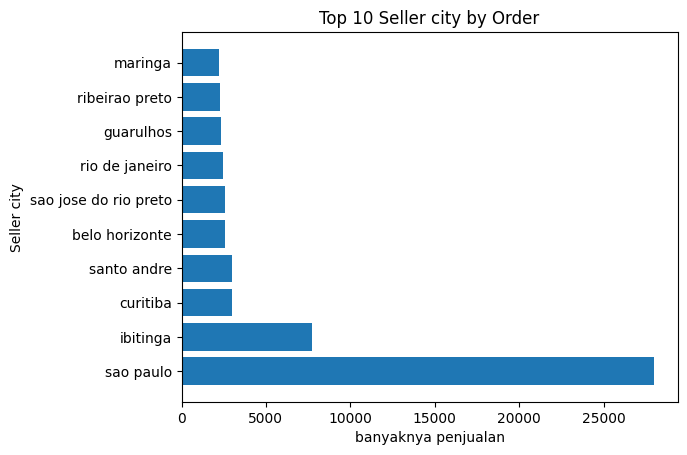

In [33]:
city_counts = seller_order_df.groupby("seller_city")["seller_id"].count()
top_city = city_counts.sort_values(ascending=False).head(10)

plt.barh(y=top_city.index, width=top_city.values)
plt.xlabel('banyaknya penjualan')  # Label for x-axis
plt.ylabel('Seller city')  # Label for y-axis
plt.title('Top 10 Seller city by Order')  # Title for the plot
plt.show()

content for

In [43]:
file_path = 'drive/MyDrive/Dataset/seller_order.csv'
seller_order_df.to_csv(file_path, index=False)

In [47]:
file_path2= 'drive/MyDrive/Dataset/product_items.csv'
product_df.to_csv(file_path2, index=False)